# 0. Station Information

* Station name: Trout Beck THAMES_HAMMERSMITH_E_200707
* Water Quality Data link: https://environment.data.gov.uk/hydrology/station/HAMME2

In [ ]:
# Import the relevant libraries
import pandas as pd
from pathlib import Path
import requests
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
from datetime import datetime

# 1. Download the data

In [ ]:
# Import the Base Classes and Helper Functions from the Project GitHub
url = "https://raw.githubusercontent.com/VinceMoran/EA_Water_Quality_Time_Series_Prediction/main/base_classes_and_helper_functions.py"

file_path = Path("base_classes_and_helper_functions.py")
if not file_path.exists():
    urllib.request.urlretrieve(url, file_path)
import base_classes_and_helper_functions as bchf

# Set the random seed for all PNRGs to ensure reproducibility
bchf.set_random_seed()

In [ ]:
# Create the path to the directory containing the data in the Jupyter notebook environment
data_path = bchf.load_raw_data(url="https://github.com/VinceMoran/EA_Water_Quality_Time_Series_Prediction/raw/main/data/raw_data/river_thames/THAMES_HAMMERSMITH_E_200707/raw_water_quality_parameter_data.zip")

# Assign the full filepath for the preprocessed data
parameter_path = "/content" / data_path / "raw_water_quality_parameter_data" / "df_parameters_raw.csv"

[INFO] data/raw_data directory already exists.
[INFO] Downloading data...
[INFO] Data extracted to data/raw_data.
[INFO] ZIP file removed.


# 2. Load the data into pandas DataFrames

In [ ]:
# Assign the filepaths for the raw parameter data
ammonium_path = Path("/content/data/raw_data/raw_water_quality_parameter_data/ammonium.csv")
conductivity_path = Path("/content/data/raw_data/raw_water_quality_parameter_data/conductivity.csv")
oxygen_conc_path = Path("/content/data/raw_data/raw_water_quality_parameter_data/dissolved_oxygen_concentration.csv")
oxygen_perc_path = Path("/content/data/raw_data/raw_water_quality_parameter_data/dissolved_oxygen_percentage.csv")
temperature_path = Path("/content/data/raw_data/raw_water_quality_parameter_data/temperature.csv")
turbidity_path = Path("/content/data/raw_data/raw_water_quality_parameter_data/turbidity.csv")

In [ ]:
# Load the data into pandas DataFrames
df_ammonium = pd.read_csv(ammonium_path)
df_conductivity = pd.read_csv(conductivity_path)
df_oxygen_conc = pd.read_csv(oxygen_conc_path)
df_oxygen_perc = pd.read_csv(oxygen_perc_path)
df_temperature = pd.read_csv(temperature_path)
df_turbidity = pd.read_csv(turbidity_path)

# 3. Investigate the raw data DataFrames

In [ ]:
# Compute the unique value distributions for each DataFrame
bchf.unique_value_counts(df_ammonium, "AMMONIUM DATAFRAME")
print("\n----------------------------------------")
bchf.unique_value_counts(df_conductivity, "CONDUCTIVITY DATAFRAME")
print("\n----------------------------------------")
bchf.unique_value_counts(df_oxygen_conc, "DISSOLVED OXYGEN CONCENTRATION DATAFRAME")
print("\n----------------------------------------")
bchf.unique_value_counts(df_oxygen_perc, "DISSOLVED OXYGEN PERCENTAGE SATURATION DATAFRAME")
print("\n----------------------------------------")
bchf.unique_value_counts(df_temperature, "TEMPERATURE DATAFRAME")
print("\n----------------------------------------")
bchf.unique_value_counts(df_turbidity, "TURBIDITY DATAFRAME")

DISTINCT VALUE COUNTS FOR AMMONIUM DATAFRAME:
Variable         Number of Distinct Value Counts
measure                      1            

dateTime                  634606          

date                       6608           

value                      9580           

completeness                 0            

quality                      1            

qcode                        0            


----------------------------------------
DISTINCT VALUE COUNTS FOR CONDUCTIVITY DATAFRAME:
Variable         Number of Distinct Value Counts
measure                      1            

dateTime                  634606          

date                       6608           

value                      65694          

completeness                 0            

quality                      1            

qcode                        0            


----------------------------------------
DISTINCT VALUE COUNTS FOR DISSOLVED OXYGEN CONCENTRATION DATAFRAME:
Variable         Number of Distinct Va

In [ ]:
# Determine the datatype and number of missing values for each variable
bchf.datatypes_and_missing_values(df_ammonium, "AMMONIUM DATAFRAME")
print("\n----------------------------------------")
bchf.datatypes_and_missing_values(df_conductivity, "CONDUCTIVITY DATAFRAME")
print("\n----------------------------------------")
bchf.datatypes_and_missing_values(df_oxygen_conc, "DISSOLVED OXYGEN CONCENTRATION DATAFRAME")
print("\n----------------------------------------")
bchf.datatypes_and_missing_values(df_oxygen_perc, "DISSOLVED OXYGEN PERCENTAGE DATAFRAME")
print("\n----------------------------------------")
bchf.datatypes_and_missing_values(df_temperature, "TEMPERATURE DATAFRAME")
print("\n----------------------------------------")
bchf.datatypes_and_missing_values(df_turbidity, "TURBIDITY DATAFRAME")

DATATYPES AND MISSING VALUES FOR AMMONIUM DATAFRAME
Variable           Data Type      Number of Missing Values
measure           , object        ,            0            
dateTime          , object        ,            0            
date              , object        ,            0            
value             , float64       ,            0            
completeness      , float64       ,          634606         
quality           , object        ,            0            
qcode             , float64       ,          634606         

----------------------------------------
DATATYPES AND MISSING VALUES FOR CONDUCTIVITY DATAFRAME
Variable           Data Type      Number of Missing Values
measure           , object        ,            0            
dateTime          , object        ,            0            
date              , object        ,            0            
value             , float64       ,            0            
completeness      , float64       ,          634606         


# 4. Reindex and merge DataFrames based on sample date and time

In [ ]:
# Create lists for DataFrames and column names after merging
df_list = [df_ammonium, df_conductivity, df_oxygen_conc, df_oxygen_perc, df_temperature, df_turbidity]
column_names = ["ammonium", "conductivity", "oxygen_conc", "oxygen_perc", "temperature", "turbidity"]

# Loop through DataFrames and column names to reformat and reindex
for df, name in zip(df_list, column_names):
  # Remove the redundant columns
  df.drop(columns=['measure', 'date', 'completeness', 'quality', 'qcode'], inplace=True)

  # Change the data type for the dateTime column to datetime64
  df["dateTime"] = pd.to_datetime(df["dateTime"])

  # Set the datetime column as the index
  df.set_index('dateTime', inplace=True)

  # Rename the value column to reflect the name of the water quality parameter
  df.rename(columns={"value": name}, inplace=True)

In [ ]:
# Merge the DataFrames using dateTime as the index
df_parameters = pd.concat(df_list, axis=1).sort_index()
df_parameters

,ammonium,conductivity,oxygen_conc,oxygen_perc,temperature,turbidity
dateTime,,,,,,
2007-07-01 00:04:00,0.504,613.00,NaN,14.20,17.32,3.1
2007-07-01 00:19:00,0.458,626.00,NaN,14.10,17.32,2.8
2007-07-01 00:34:00,0.397,610.00,NaN,14.20,17.30,3.1
2007-07-01 00:49:00,0.368,609.00,NaN,14.10,17.32,2.5
2007-07-01 01:04:00,0.360,609.00,NaN,14.10,17.36,3.1
...,...,...,...,...,...,...
2025-09-29 08:00:35,1.460,1407.15,8.01,80.93,15.66,NaN
2025-09-29 08:15:35,1.380,1325.75,7.96,80.41,15.70,NaN
2025-09-29 08:30:35,1.360,1254.24,7.92,80.04,15.74,NaN


# 5. Investigate the merged DataFrame

In [ ]:
# Compute the unique value distributions for the merged DataFrame
bchf.unique_value_counts(df_parameters, "WATER QUALITY PARAMETER DATAFRAME")
print("\n----------------------------------------")

# Determine the datatype and number of missing values for each variable
bchf.datatypes_and_missing_values(df_parameters, "WATER QUALITY PARAMETER DATAFRAME")

DISTINCT VALUE COUNTS FOR WATER QUALITY PARAMETER DATAFRAME:
Variable         Number of Distinct Value Counts
ammonium                   9580           

conductivity               65694          

oxygen_conc                2053           

oxygen_perc                13438          

temperature                2385           

turbidity                  12015          


----------------------------------------
DATATYPES AND MISSING VALUES FOR WATER QUALITY PARAMETER DATAFRAME
Variable           Data Type      Number of Missing Values
ammonium          , float64       ,            0            
conductivity      , float64       ,            0            
oxygen_conc       , float64       ,           1683          
oxygen_perc       , float64       ,            0            
temperature       , float64       ,            0            
turbidity         , float64       ,          102367         


# 6. Save the merged DataFrame to a .csv file

In [ ]:
# Specify the file path for saving the DataFrame as a csv file
df_parameters_path = Path("/content/data/raw_data/df_parameters.csv")

# Save the DataFrame to a csv file
df_parameters.to_csv(df_parameters_path, index=False)

# 7. Visualise the raw data

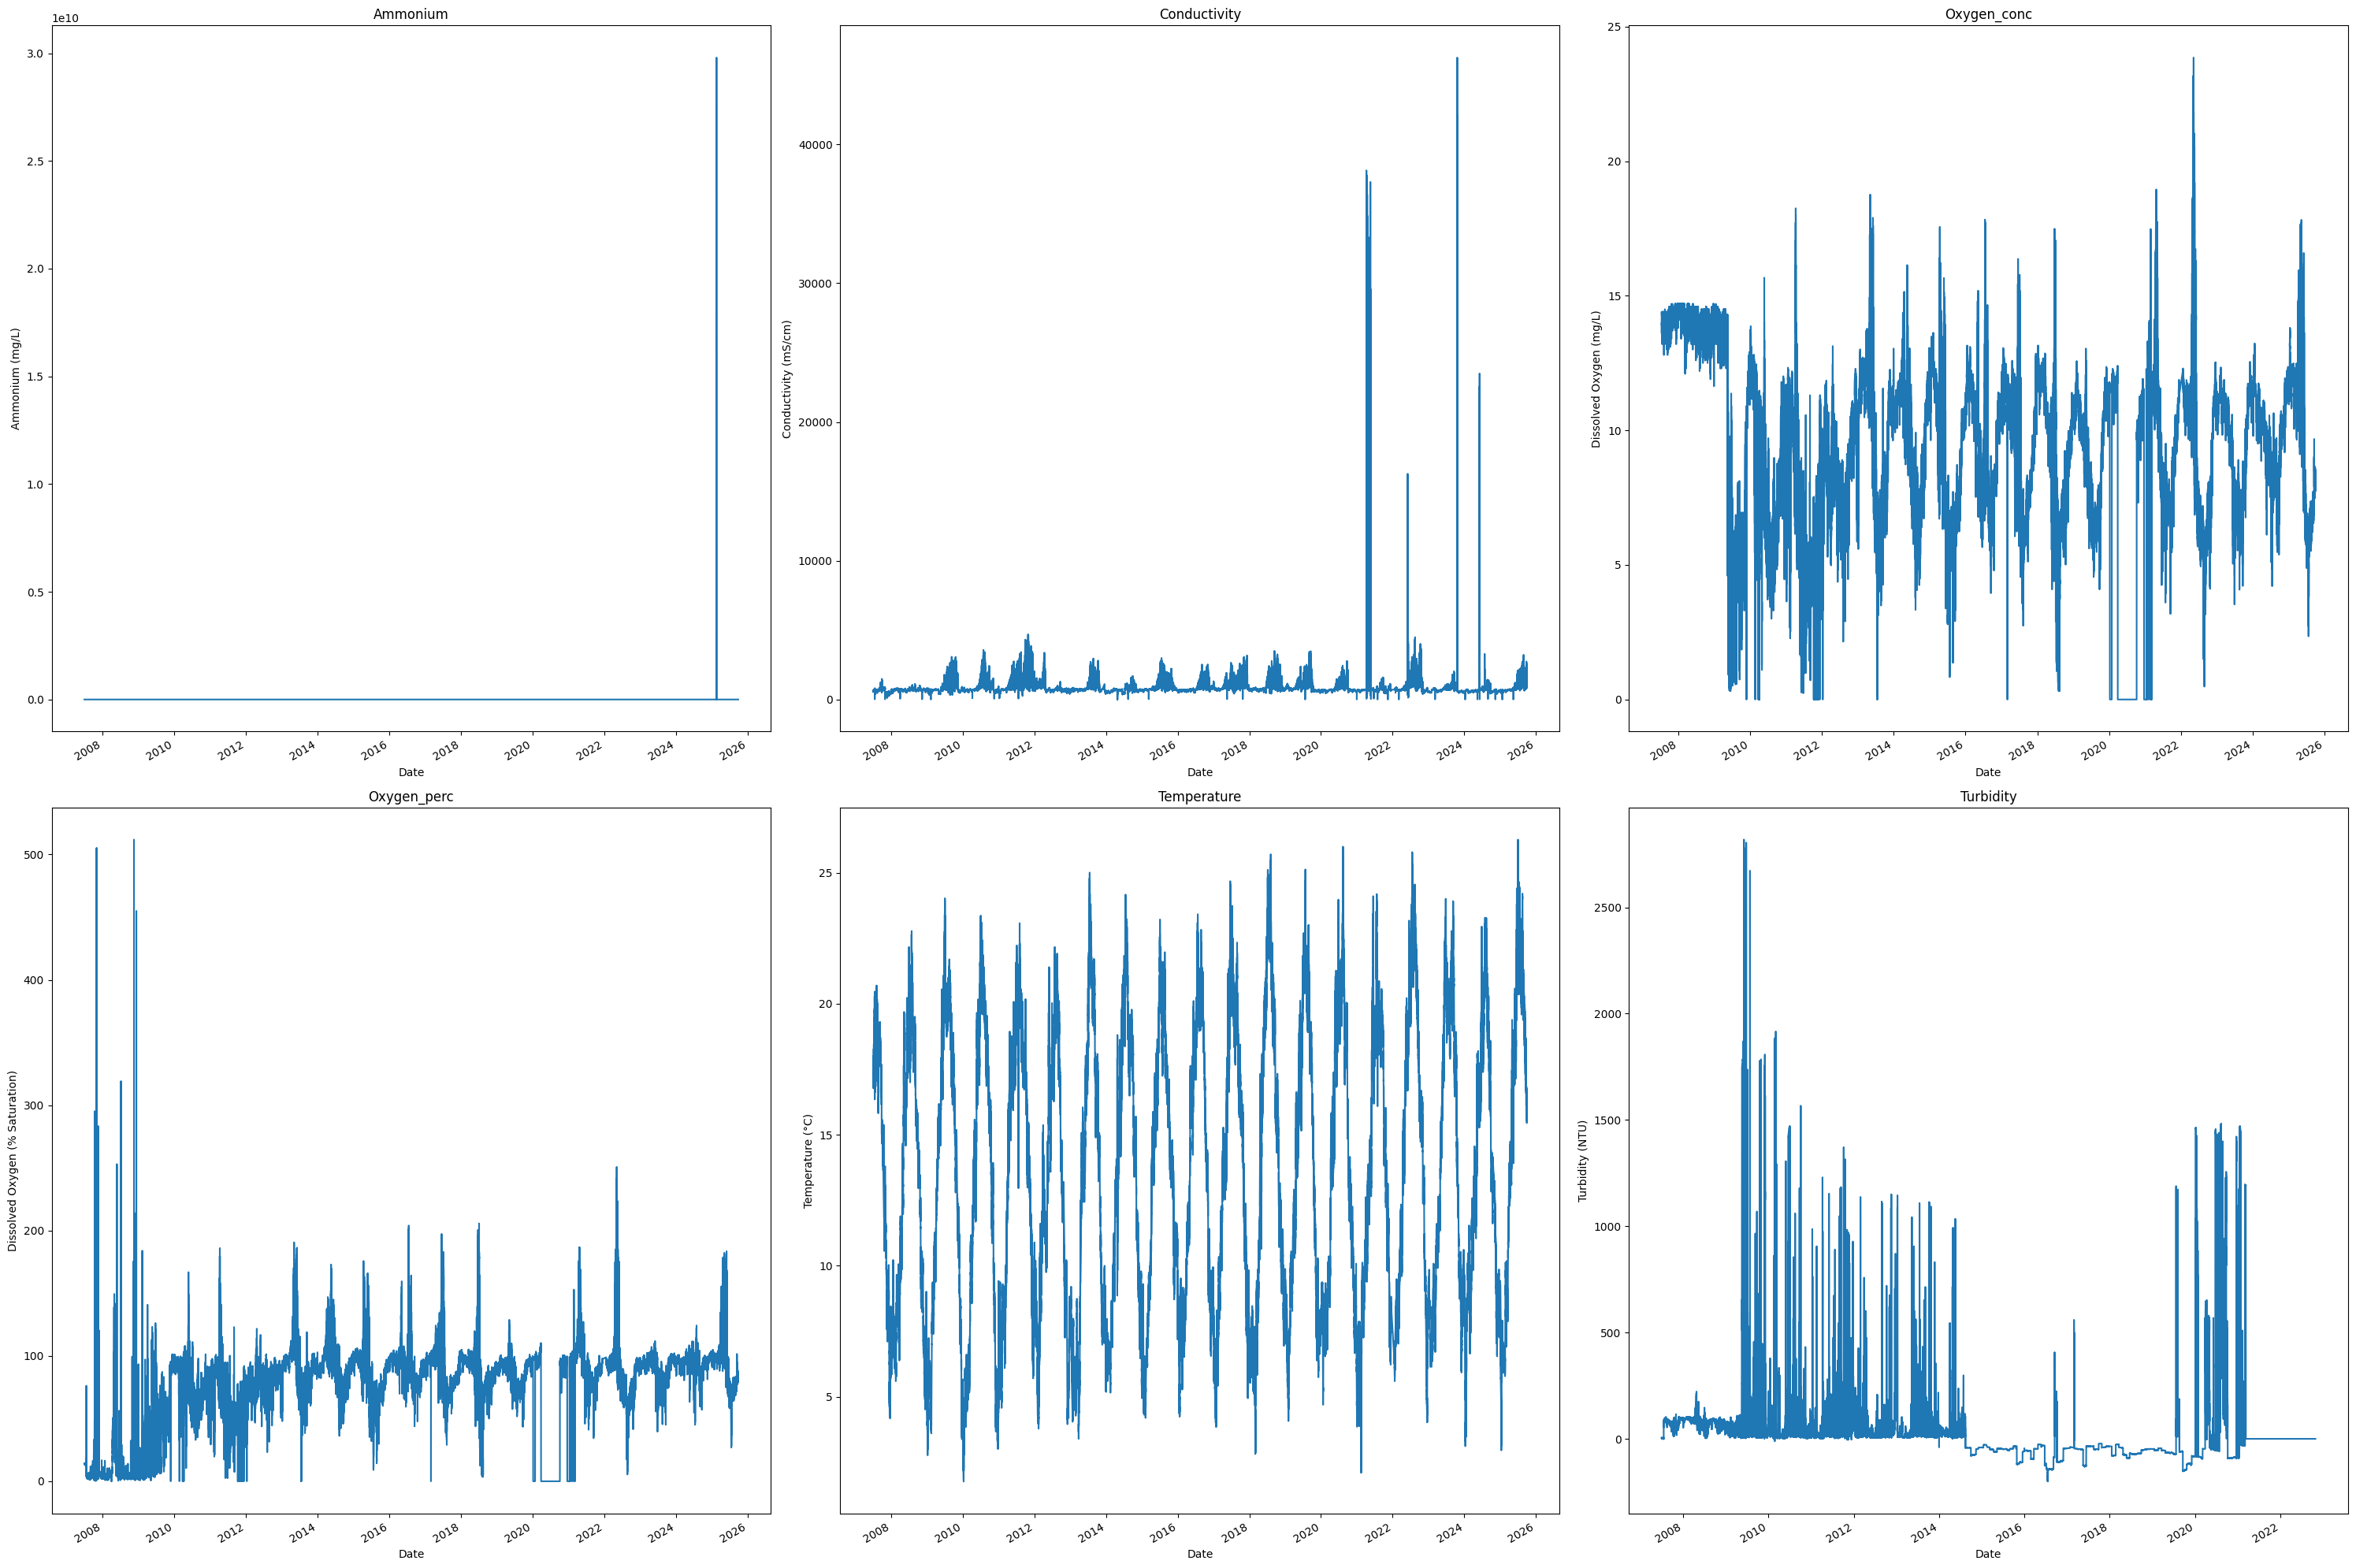

In [ ]:
# Create a figure and sets of axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))

# Define axis labels and titles
x_label = "Date"
y_labels = ["Ammonium (mg/L)", "Conductivity (mS/cm)", "Dissolved Oxygen (mg/L)", "Dissolved Oxygen (% Saturation)", "Temperature (°C)", "Turbidity (NTU)"]

# Plot the water quality variables
for i in range(len(column_names)):
  if i < 3:
    ax = axes[0, i]
  else:
    ax = axes[1, i-3]

  df_parameters[column_names[i]].plot(ax=ax)
  ax.set_title(column_names[i][0].upper() + column_names[i][1:])
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_labels[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# 8. Detect and process outliers

In [ ]:
# Define implausible value limits based on domain knowledge
lower_bounds = [0, # ammonium (mg/L)
20, # conductivity (mS/cm)
0, # dissolved oxygen (mg/L)
0, #dissolved oxygen (%)
0, # temperature
0, # turbidity
]

upper_bounds = [10, # ammonium (mg/L)
5000, # conductivity (mS/cm)
30, # dissolved oxygen (mg/L)
200, #dissolved oxygen (%)
50, # temperature
1500, # turbidity
]

In [ ]:
# Remove implausible values based on domain knowledge
df_parameters["ammonium_impossible"] = (df_parameters['ammonium'] >= upper_bounds[0]) | (df_parameters['ammonium'] <= lower_bounds[0])
df_parameters["conductivity_impossible"] = (df_parameters['conductivity'] >= upper_bounds[1]) | (df_parameters['conductivity'] <= lower_bounds[1])
df_parameters["oxygen_conc_impossible"] = (df_parameters['oxygen_conc'] >= upper_bounds[2]) | (df_parameters['oxygen_conc'] <= lower_bounds[2])
df_parameters["oxygen_perc_impossible"] = (df_parameters['oxygen_perc'] >= upper_bounds[3]) | (df_parameters['oxygen_perc'] <= lower_bounds[3])
df_parameters["temperature_impossible"] = (df_parameters['temperature'] >= upper_bounds[4]) | (df_parameters['temperature'] <= lower_bounds[4])
df_parameters["turbidity_impossible"] = (df_parameters['turbidity'] >= upper_bounds[5]) | (df_parameters['turbidity'] <= lower_bounds[5])

In [ ]:
# Flag anomalies using rolling median windows for features with extreme values
df_parameters["ammonium_anomaly"] = bchf.rolling_median_detect(dataframe=df_parameters,
                                                               variable_name="ammonium",
                                                               window=6,
                                                               threshold=3)
df_parameters["conductivity_anomaly"] = bchf.rolling_median_detect(dataframe=df_parameters,
                                                                   variable_name="conductivity",
                                                                   window=6,
                                                                   threshold=3)
df_parameters["oxygen_perc_anomaly"] = bchf.rolling_median_detect(dataframe=df_parameters,
                                                                  variable_name="oxygen_perc",
                                                                  window=6,
                                                                  threshold=3)
df_parameters["turbidity_anomaly"] = bchf.rolling_median_detect(dataframe=df_parameters,
                                                                variable_name="turbidity",
                                                                window=6,
                                                                threshold=3)

# Flag anomalies using rolling mean windows for targets with fewer extreme values
df_parameters["oxygen_conc_anomaly"] = bchf.rolling_mean_detect(dataframe=df_parameters,
                                                                variable_name="oxygen_conc",
                                                                window=6,
                                                                threshold=3)
df_parameters["temperature_anomaly"] = bchf.rolling_mean_detect(dataframe=df_parameters,
                                                                variable_name="temperature",
                                                                window=6,
                                                                threshold=3)

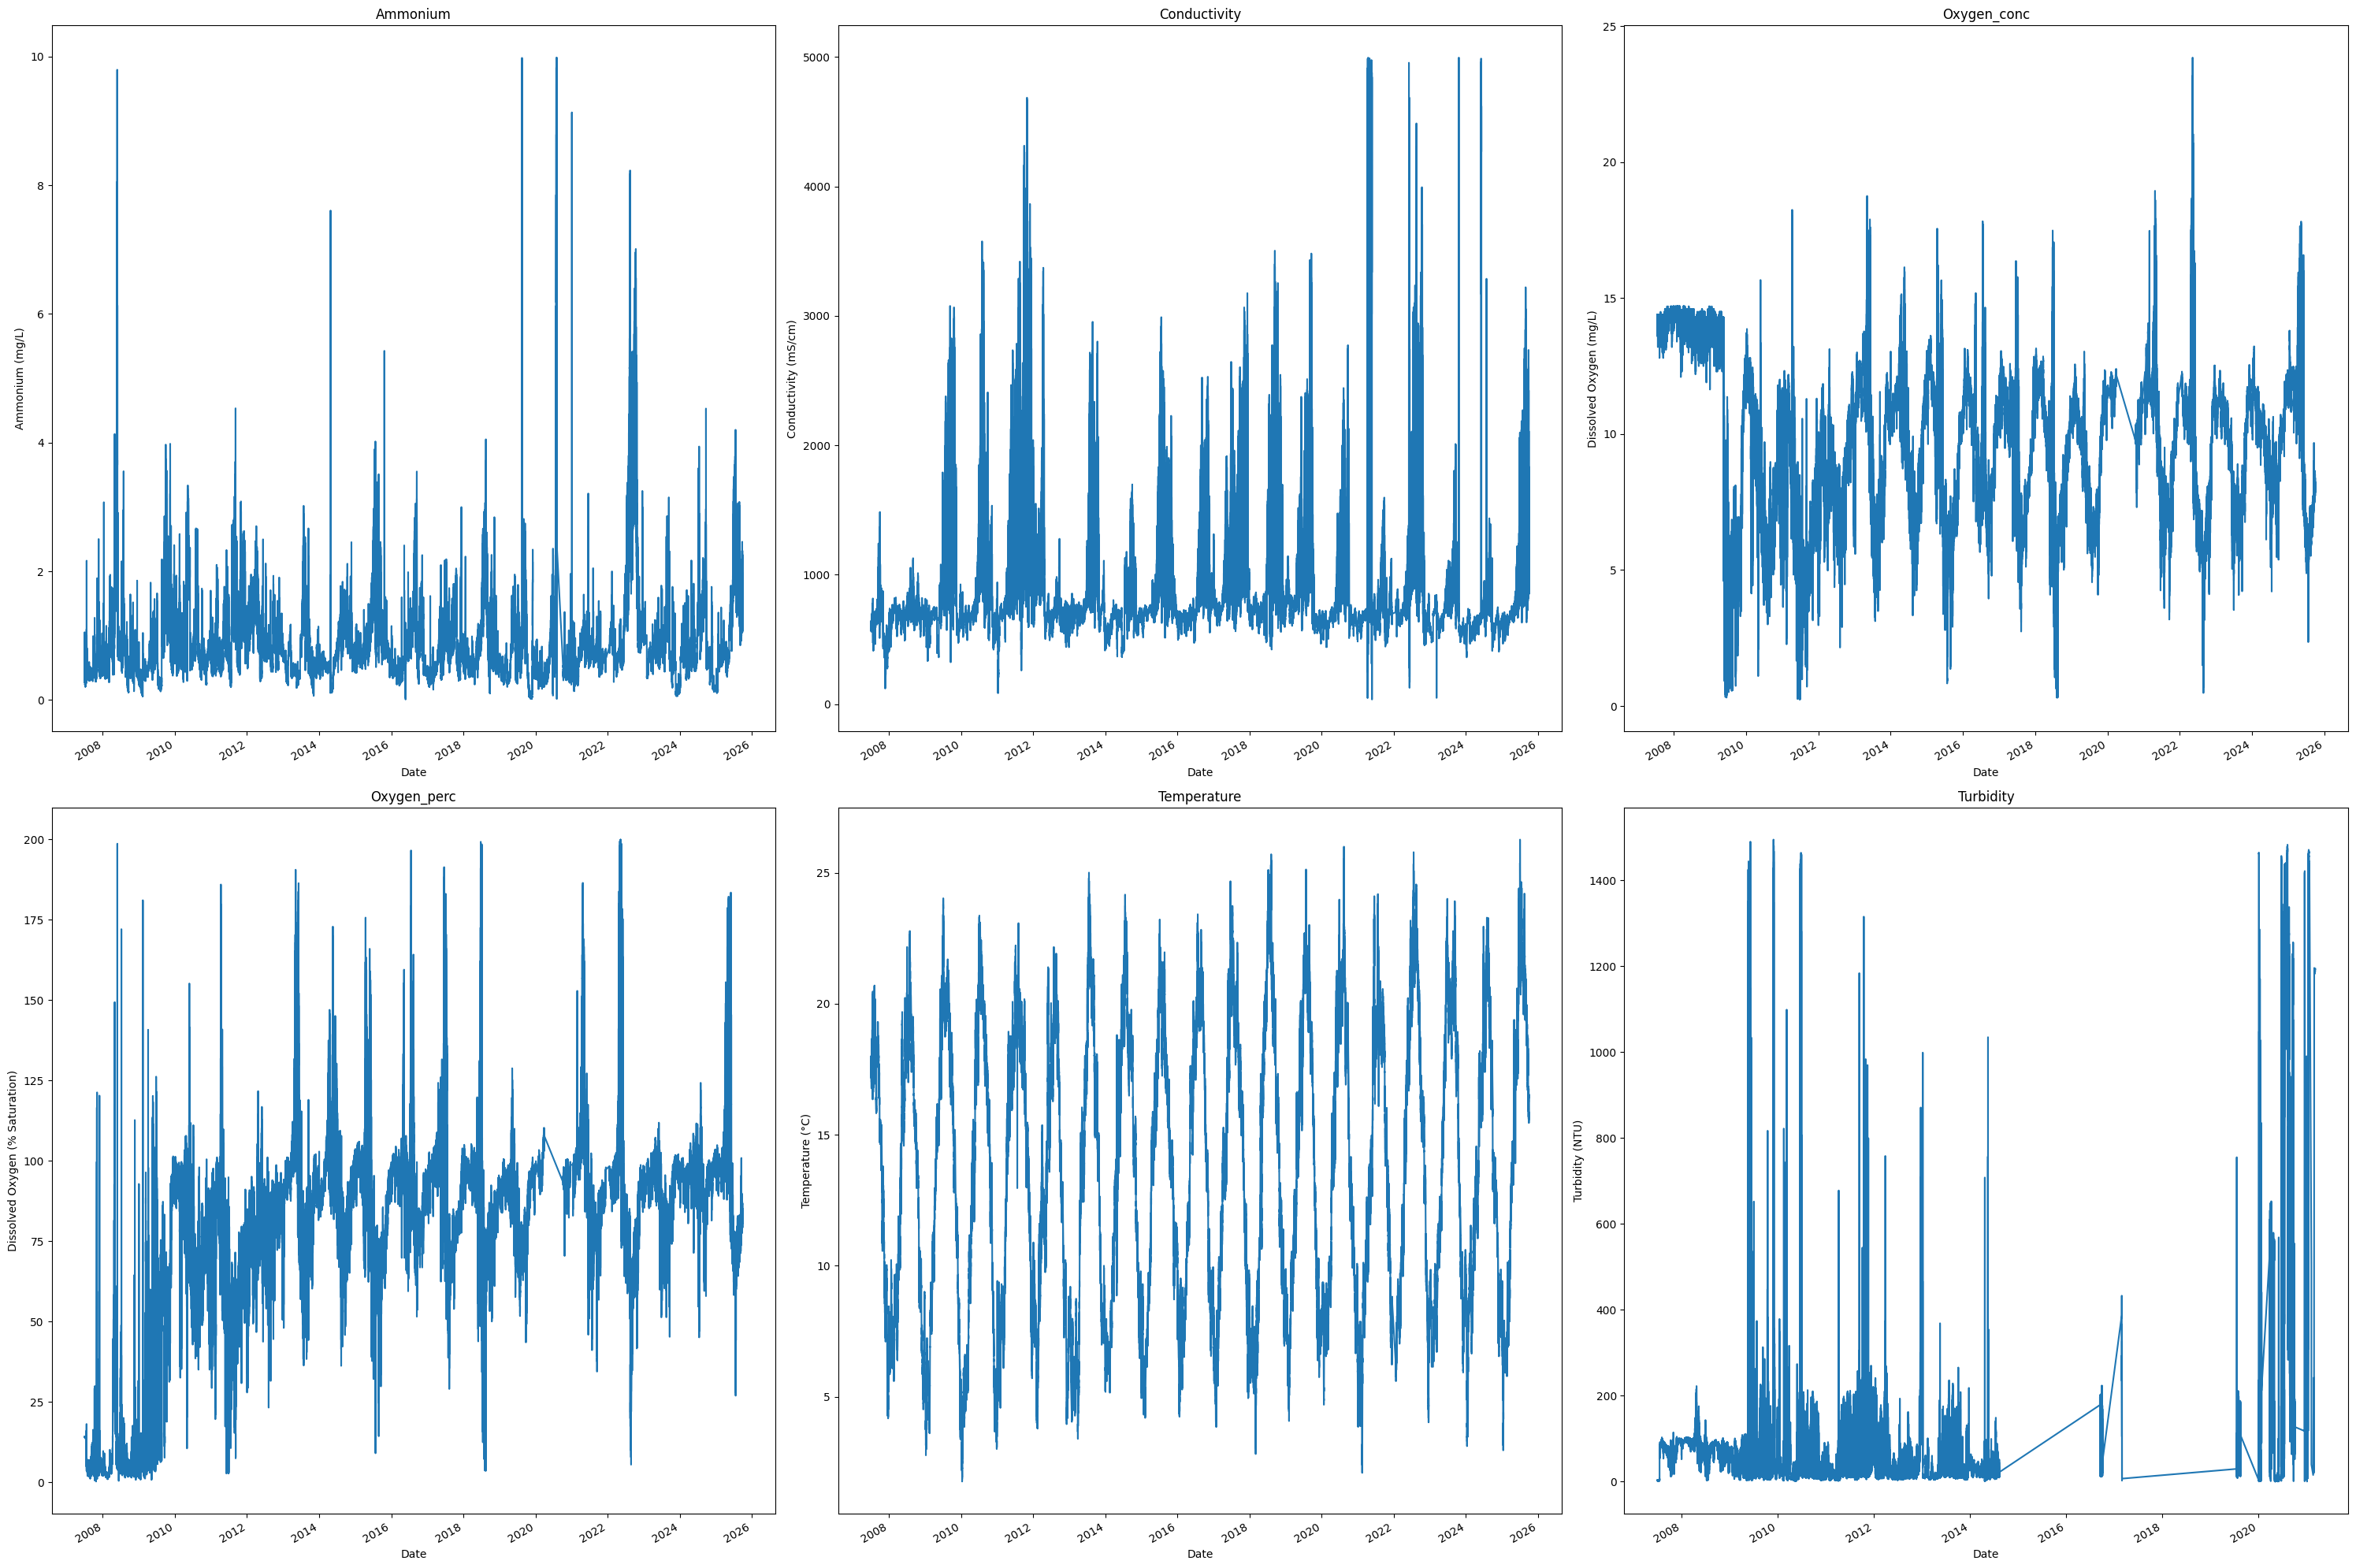

In [ ]:
# Create a figure and sets of axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))

# Define list of anomaly detection variable names
anomaly_names = ["ammonium_anomaly", "conductivity_anomaly", "oxygen_conc_anomaly", "oxygen_perc_anomaly", "temperature_anomaly", "turbidity_anomaly"]
impossible_names = ["ammonium_impossible", "conductivity_impossible", "oxygen_conc_impossible", "oxygen_perc_impossible", "temperature_impossible", "turbidity_impossible"]

### Plot the water quality variables
for i in range(len(column_names)):
  if i < 3:
    ax = axes[0, i]
  else:
    ax = axes[1, i-3]
  # Plot only the possible and non-anomalous values
  mask = (~df_parameters[anomaly_names[i]]) & (~df_parameters[impossible_names[i]])
  df_clean = df_parameters[mask]
  df_clean[column_names[i]].plot(ax=ax)
  ax.set_title(column_names[i][0].upper() + column_names[i][1:])
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_labels[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# 9. Save the DataFrame with Flagged Anomalies as a .csv File

In [ ]:
# Specify the file path for saving the DataFrame as a csv file
df_parameters_flagged_path = Path("/content/data/processed_data/df_parameters_flagged.csv")

# Save the DataFrame to a csv file
df_parameters.to_csv(df_parameters_path, index=True)

##10. Explore the DataFrame After Anomaly Flagging

In [ ]:
# Compute the unique value distributions for the merged DataFrame
bchf.unique_value_counts(df_parameters, "WATER QUALITY PARAMETER DATAFRAME")
print("\n----------------------------------------")

# Determine the datatype and number of missing values for each variable
bchf.datatypes_and_missing_values(df_parameters, "WATER QUALITY PARAMETER DATAFRAME")

DISTINCT VALUE COUNTS FOR WATER QUALITY PARAMETER DATAFRAME:
Variable         Number of Distinct Value Counts
ammonium                   9580           

conductivity               65694          

oxygen_conc                2053           

oxygen_perc                13438          

temperature                2385           

turbidity                  12015          

ammonium_impossible             2            

conductivity_impossible             2            

oxygen_conc_impossible             2            

oxygen_perc_impossible             2            

temperature_impossible             1            

turbidity_impossible             2            

ammonium_anomaly             2            

conductivity_anomaly             2            

oxygen_perc_anomaly             2            

turbidity_anomaly             2            

oxygen_conc_anomaly             1            

temperature_anomaly             1            


----------------------------------------
DATATYPES 

In [ ]:
# Count impossible and anomalous values for each variable
print(f"There are {np.sum(df_parameters["ammonium_impossible"].values)} impossible values for ammonium.")
print(f"There are {np.sum(df_parameters["ammonium_anomaly"].values)} anomalous values for ammonium.")
print("--------------------------------------------------------------------------------")
print(f"There are {np.sum(df_parameters["conductivity_impossible"].values)} impossible values for conductivity")
print(f"There are {np.sum(df_parameters["conductivity_anomaly"].values)} anomalous values for conductivity")
print("--------------------------------------------------------------------------------")
print(f"There are {np.sum(df_parameters["oxygen_conc_impossible"].values)} impossible values for dissolved oxygen concentration")
print(f"There are {np.sum(df_parameters["oxygen_conc_anomaly"].values)} anomalous values for dissolved oxygen concentration")
print("--------------------------------------------------------------------------------")
print(f"There are {np.sum(df_parameters["oxygen_perc_impossible"].values)} impossible values for dissolved oxygen percentage")
print(f"There are {np.sum(df_parameters["oxygen_perc_anomaly"].values)} anomalous values for dissolved oxygen percentage")
print("--------------------------------------------------------------------------------")
print(f"There are {np.sum(df_parameters["temperature_impossible"].values)} impossible values for temperature")
print(f"There are {np.sum(df_parameters["temperature_anomaly"].values)} anomalous values for temperature")
print("--------------------------------------------------------------------------------")
print(f"There are {np.sum(df_parameters["conductivity_impossible"].values)} impossible values for conductivity")
print(f"There are {np.sum(df_parameters["conductivity_anomaly"].values)} anomalous values for conductivity")
print("--------------------------------------------------------------------------------")
print(f"There are {np.sum(df_parameters["turbidity_impossible"].values)} impossible values for turbidity")
print(f"There are {np.sum(df_parameters["turbidity_anomaly"].values)} anomalous values for turbidity")

There are 6915 impossible values for ammonium.
There are 59150 anomalous values for ammonium.
--------------------------------------------------------------------------------
There are 4630 impossible values for conductivity
There are 61887 anomalous values for conductivity
--------------------------------------------------------------------------------
There are 24752 impossible values for dissolved oxygen concentration
There are 0 anomalous values for dissolved oxygen concentration
--------------------------------------------------------------------------------
There are 25069 impossible values for dissolved oxygen percentage
There are 48431 anomalous values for dissolved oxygen percentage
--------------------------------------------------------------------------------
There are 0 impossible values for temperature
There are 0 anomalous values for temperature
--------------------------------------------------------------------------------
There are 4630 impossible values for conductiv

In [ ]:
# Check that all measurements start and end at the same time
print(f"The first ammonium measurement was taken on {df_parameters['ammonium'].first_valid_index()}")
print(f"The last ammonium measurement was taken on {df_parameters['ammonium'].last_valid_index()}")
print("-------------------------------------------------------------------------------------------")
print(f"The first conductivity measurement was taken on {df_parameters['conductivity'].first_valid_index()}")
print(f"The last conductivity measurement was taken on {df_parameters['conductivity'].last_valid_index()}")
print("-------------------------------------------------------------------------------------------")
print(f"The first dissolved oxygen concentration measurement was taken on {df_parameters['oxygen_conc'].first_valid_index()}")
print(f"The last dissolved oxygen concentration measurement was taken on {df_parameters['oxygen_conc'].last_valid_index()}")
print("-------------------------------------------------------------------------------------------")
print(f"The first dissolved oxygen percentage measurement was taken on {df_parameters['oxygen_perc'].first_valid_index()}")
print(f"The last dissolved oxygen percentage measurement was taken on {df_parameters['oxygen_perc'].last_valid_index()}")
print("-------------------------------------------------------------------------------------------")
print(f"The first temperature measurement was taken on {df_parameters['temperature'].first_valid_index()}")
print(f"The last temperature measurement was taken on {df_parameters['temperature'].last_valid_index()}")
print("-------------------------------------------------------------------------------------------")
print(f"The first turbidity measurement was taken on {df_parameters['turbidity'].first_valid_index()}")
print(f"The last turbidity measurement was taken on {df_parameters['turbidity'].last_valid_index()}")

The first ammonium measurement was taken on 2007-07-01 00:04:00
The last ammonium measurement was taken on 2025-09-29 09:00:29
-------------------------------------------------------------------------------------------
The first conductivity measurement was taken on 2007-07-01 00:04:00
The last conductivity measurement was taken on 2025-09-29 09:00:29
-------------------------------------------------------------------------------------------
The first dissolved oxygen concentration measurement was taken on 2007-07-18 12:49:00
The last dissolved oxygen concentration measurement was taken on 2025-09-29 09:00:29
-------------------------------------------------------------------------------------------
The first dissolved oxygen percentage measurement was taken on 2007-07-01 00:04:00
The last dissolved oxygen percentage measurement was taken on 2025-09-29 09:00:29
-------------------------------------------------------------------------------------------
The first temperature measurement 

In [ ]:
# Trim the DataFrame to a common start time for the targets
temp_first, do_first = df_parameters["temperature"].first_valid_index(), df_parameters["oxygen_conc"].first_valid_index()
temp_last, do_last = df_parameters["temperature"].last_valid_index(), df_parameters["oxygen_conc"].last_valid_index()

start = max(temp_first, do_first)
end = min(temp_last, do_last)
df_parameters = df_parameters.loc[start:end].copy()

df_parameters.head()

,ammonium,conductivity,oxygen_conc,oxygen_perc,temperature,turbidity,ammonium_impossible,conductivity_impossible,oxygen_conc_impossible,oxygen_perc_impossible,temperature_impossible,turbidity_impossible,ammonium_anomaly,conductivity_anomaly,oxygen_perc_anomaly,turbidity_anomaly,oxygen_conc_anomaly,temperature_anomaly
dateTime,,,,,,,,,,,,,,,,,,
2007-07-18 12:49:00,0.618,708.0,14.3,5.0,20.06,85.7,False,False,False,False,False,False,True,False,True,True,False,False
2007-07-18 13:04:00,0.586,708.0,14.4,5.2,20.08,85.7,False,False,False,False,False,False,True,False,True,True,False,False
2007-07-18 13:19:00,0.571,708.0,14.3,4.9,20.11,86.1,False,False,False,False,False,False,False,False,False,False,False,False
2007-07-18 13:34:00,0.569,712.0,14.3,5.2,20.16,85.8,False,False,False,False,False,False,False,False,False,False,False,False
2007-07-18 13:49:00,0.570,726.0,14.3,5.6,20.26,85.5,False,False,False,False,False,False,False,True,False,False,False,False


##11. Interpolate Missing, Anomalous, and Impossible Values

In [ ]:
# Create lists of column names for water quality variables, anomaly flags, and impossible flags
column_names = ["ammonium", "conductivity", "oxygen_conc", "oxygen_perc", "temperature", "turbidity"] # water quality variables
anomaly_names = ["ammonium_anomaly", "conductivity_anomaly", "oxygen_conc_anomaly", "oxygen_perc_anomaly", "temperature_anomaly", "turbidity_anomaly"] # anomaly flags
impossible_names = ["ammonium_impossible", "conductivity_impossible", "oxygen_conc_impossible", "oxygen_perc_impossible", "temperature_impossible", "turbidity_impossible"] # impossible flags

# Convert flagged anomalies or impossible values to NaN
for col_name, anomaly_col, impossible_col in zip(column_names, anomaly_names, impossible_names):
    df_parameters[col_name] = df_parameters[col_name].where(~(df_parameters[anomaly_col] | df_parameters[impossible_col]))

In [ ]:
# Use time-based interpolation to fill gaps
for col_name in column_names:
  df_parameters[col_name] = df_parameters[col_name].interpolate(method="time")

In [ ]:
# Specify the start time of the array based on domain knowledge of sensor issues
START = datetime(2009, 5, 18, 16, 19, 0)

# Trim the array to start at the specified start time
df_parameters = df_parameters.loc[START:].copy()

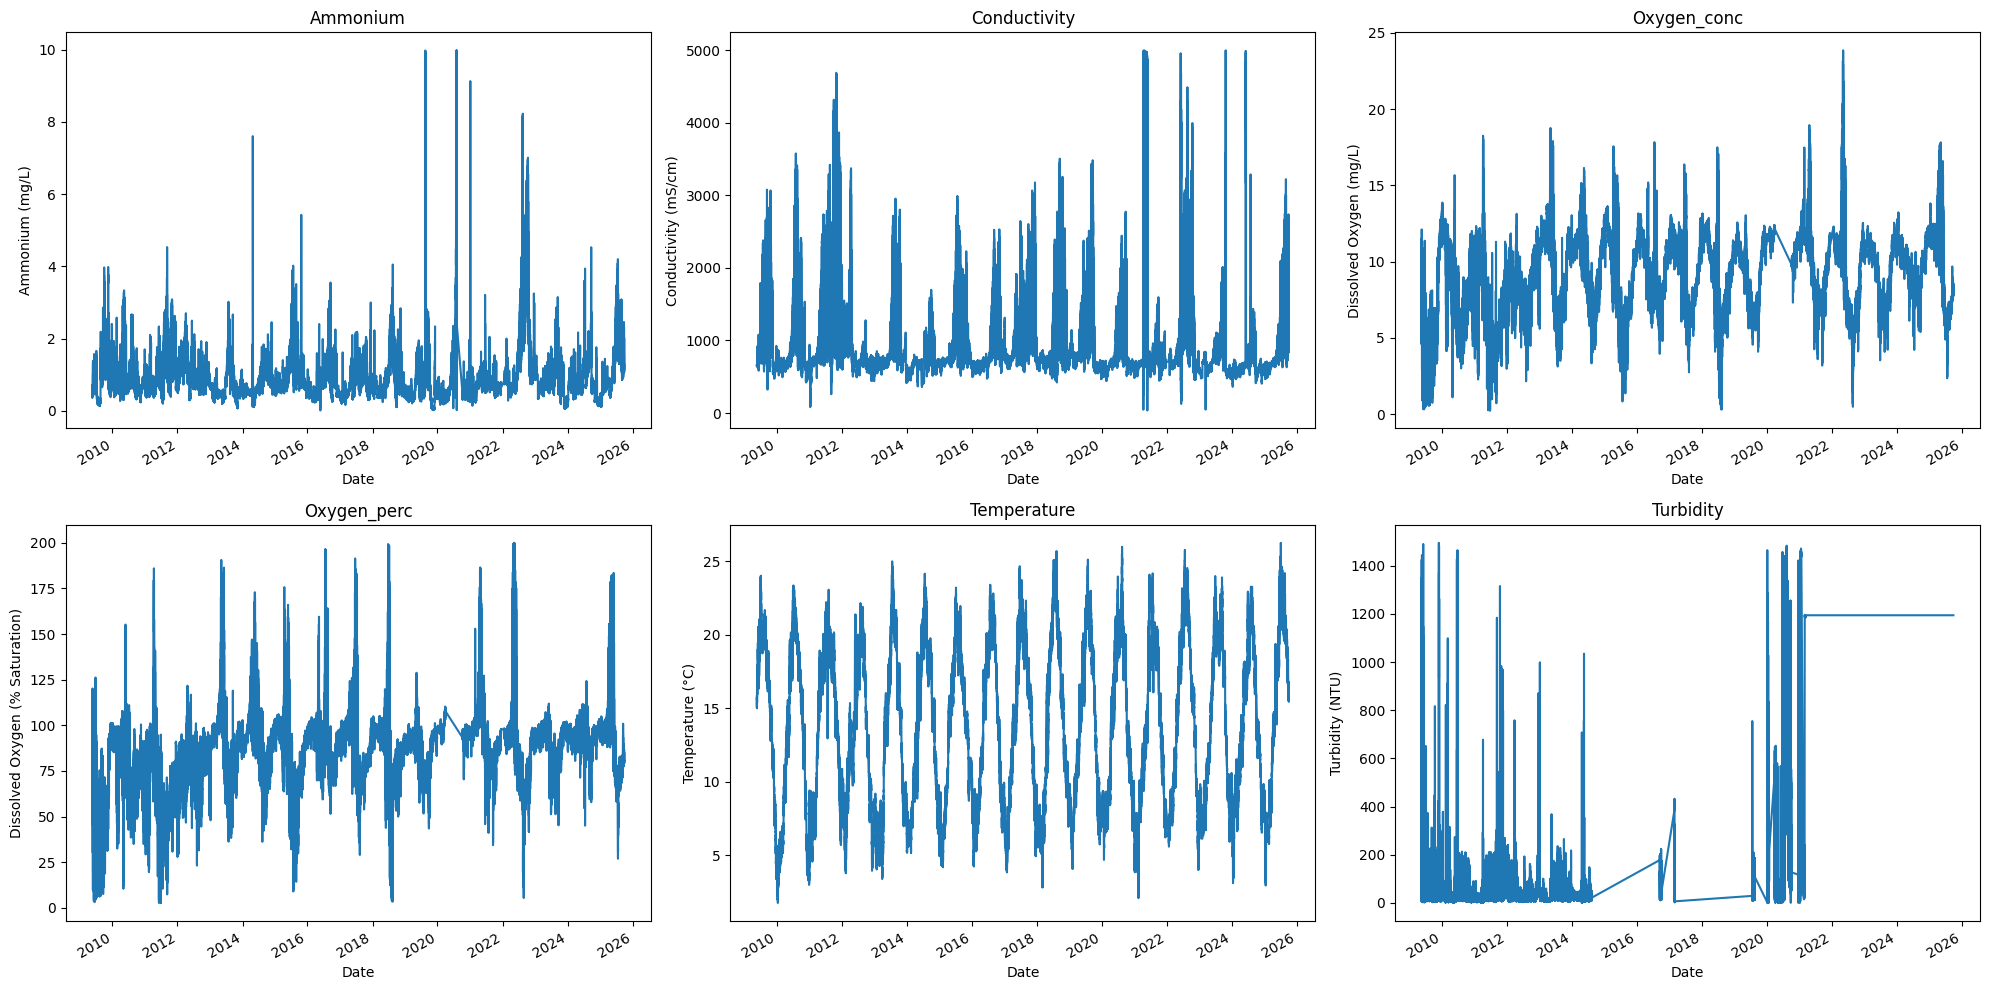

In [ ]:
# Create a figure and sets of axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Plot the water quality variables
for i in range(len(column_names)):
  if i < 3:
    ax = axes[0, i]
  else:
    ax = axes[1, i-3]

  df_parameters[column_names[i]].plot(ax=ax)
  ax.set_title(column_names[i][0].upper() + column_names[i][1:])
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_labels[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

##12. Save the Preprocessed DataFrame as a .csv File

In [ ]:
# Specify the file path for saving the DataFrame as a csv file
df_parameters_preprocessed_path = Path("/content/data/df_parameters_preprocessed.csv")

# Save the DataFrame to a csv file
df_parameters.to_csv(df_parameters_preprocessed_path, index=True)